In [5]:
import pandas as pd

# Replace 'file.csv' with your file path
df = pd.read_csv('NCSESD Community Survey Responses - Sheet1.csv')

# # Display the first few rows
# # df['nutrition_val'] = df[]
df
# df['Nutritional_val'] = df['Nutritional_val'].fillna(0)
# df['Nutritional_val'][df['Nutritional_val'] == float('inf')].count()
# df['Fiber, total dietary'] = df['Fiber, total dietary'].fillna(0)
# df['Sugars, total'] = df['Sugars, total'].fillna(0)
# # cols_to_check = ['Protein', 'Fiber, total dietary', 'Sugars, total', 'Sodium', 'Total Fat']
# # nan_counts = df[cols_to_check].isna().sum()
# df['Nutritional_val'][df['Nutritional_val']==float('inf')]

,Responses
0,“Make sure it happens as it belongs to the com...
1,“Me gustaría ver un centro recreativo para los...
2,“More green space”
3,“The environment needs more plans and a place ...
4,“Make it better”
...,...
68,Water safe instructions/ live music / Africans
69,We want a place where kids can play
70,Will be volunteering more and collaborating wi...
71,Would like to keep bridge as entrance is close...


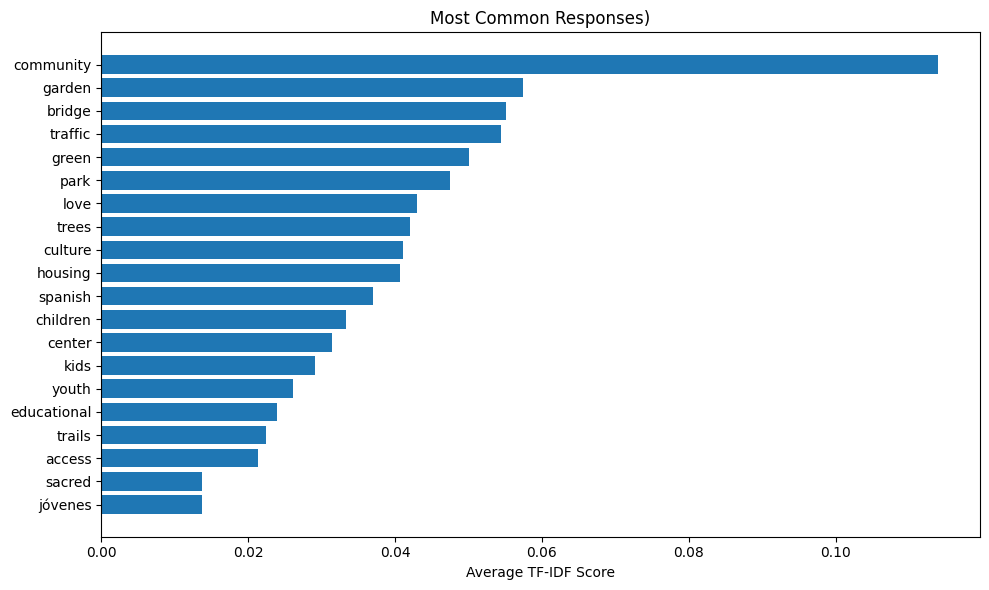

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

# Drop missing and convert to string
text_data = df['Responses'].dropna().astype(str)

# Combine English stop words with custom ones (must be a set or list)
custom_stop_words = list(ENGLISH_STOP_WORDS.union({'like', 'que', 'los', 'las', 'se', 'project', 'place', 'space', 'thank', 'area', 'en', 'needs', 'necesitan', 'mas'}))

# TF-IDF Vectorizer with custom stop words
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_features=20)
tfidf_matrix = vectorizer.fit_transform(text_data)

# Get feature names and average TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
mean_tfidf_scores = tfidf_matrix.mean(axis=0).A1  # Convert sparse matrix to 1D array

# Create DataFrame for plotting
tfidf_df = pd.DataFrame({
    'word': feature_names,
    'score': mean_tfidf_scores
}).sort_values(by='score', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(tfidf_df['word'][::-1], tfidf_df['score'][::-1])  # reverse for descending order
plt.xlabel("Average TF-IDF Score")
plt.title("Most Common Responses)")
plt.tight_layout()
plt.show()


In [10]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 1.6 MB/s eta 0:00:0000:0100:01
